In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from scipy.spatial import distance



In [6]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 100
ind_nb = 1000
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

In [7]:
#This will go in a separate file for testing schmidt states
idx=50
ss, se, sv = compute_schmidt_states_new(result, idx)

#need to check that the schmidt states are orthogonal
print("The next 2 should be 0, orthogonality check")
print(abs(np.vdot(ss[0],ss[1]))**2)
print(abs(np.vdot(se[0],se[1]))**2) # I think the environment schmidt states dont actually have to be orthogonal....

#need to check that the schmidt states are normalized
print("The next 6 should be 1, normalization check")
print(abs(np.vdot(ss[0],ss[0]))**2)
print(abs(np.vdot(ss[1],ss[1]))**2)
print(abs(np.vdot(se[0],se[0]))**2)
print(abs(np.vdot(se[1],se[1]))**2)
print(sv[0]+sv[1])
ss1=compute_schmidt_full(result,idx,1)
ss2=compute_schmidt_full(result,idx,2)
total = np.sqrt(sv[0])*ss1+np.sqrt(sv[1])*ss2
print(abs(np.vdot(total,total)))

#need to check that they sum to the global state

ss1 = compute_schmidt_full(result,idx,1)
ss2 = compute_schmidt_full(result,idx,2)
total = np.sqrt(sv[0])*ss1+np.sqrt(sv[1])*ss2
global_state = result.states[idx].full()
#print(abs(np.vdot(total,total)))
#print(abs(np.vdot(global_state,global_state)))
total_r=abs(total)
global_state_r=abs(global_state)
print("The next 3 values are measures of difference between the global state and the sum of schmidt states")
print(np.sum(total_r-global_state_r))
print(abs(np.sum(total-global_state)))
a=abs(total).flatten()
b=abs(global_state).flatten()
diff = distance.cosine(a,b)
print(diff)




The next 2 should be 0, orthogonality check
8.466514592186834e-34
1.7952074494119522e-30
The next 6 should be 1, normalization check
1.0000000000000004
1.0
0.9999999999999996
1.0
1.0000000000000004
1.0000000000000009
The next 3 values are measures of similarity between the global state and the sum of schmidt states
-1.9802826045633992e-11
1.848791945766397e-12
0


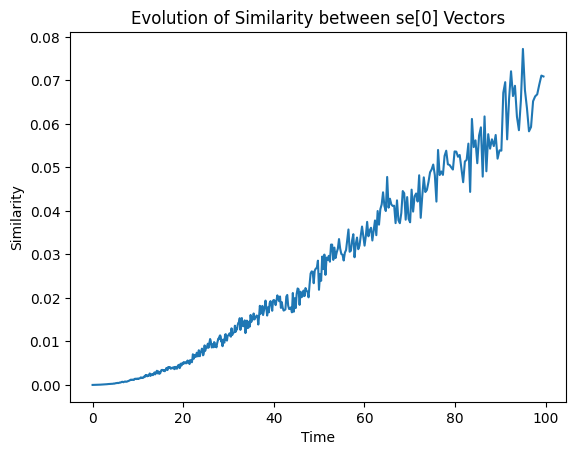

In [8]:
#need to that the schmidt states become stable over time
#to do that, we get a list of ss[0] vectors over time and check that as timer goes, they change less and less.
se0_list=[]
for i in range(len(tlist)):
    ss, se, sv = compute_schmidt_states_new(result, i)
    se = np.abs(se[0]).flatten()
    se0_list.append(se)
# Calculate the similarity between ss[0] vectors at different time indices
    step = 1
similarities = []
for i in range(len(tlist)-step):
    d = distance.cosine(se0_list[i], se0_list[i+step])
    similarities.append(d)

# Plot the similarity over time
plt.plot(tlist[0:len(tlist)-step], similarities)
plt.xlabel('Time')
plt.ylabel('Similarity')
plt.title('Evolution of Similarity between se[0] Vectors')
plt.show()

Text(0, 0.5, 'Eigenvalue Magnitude')

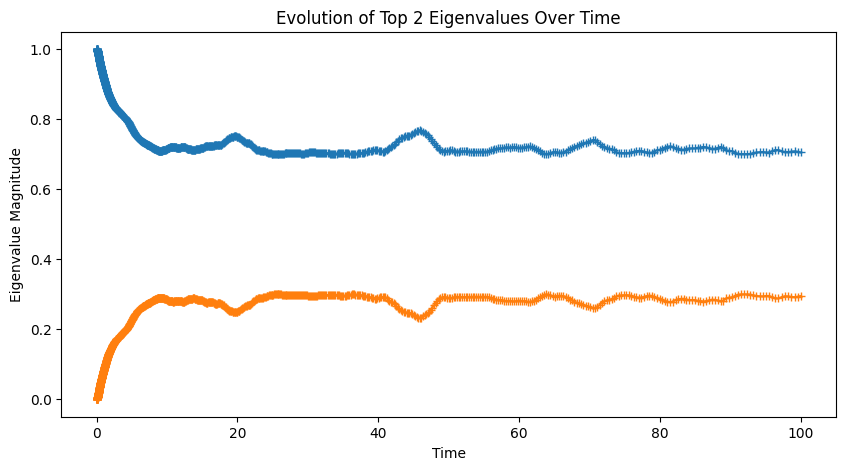

In [9]:
#testing new function

#need a plpot of schmidt value over time

s_val_0=[]
s_val_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    ss, se, sv = compute_schmidt_states_new(result, idx)
    s_val_0.append(sv[0])
    s_val_1.append(sv[1])

plt.figure(figsize=(10, 5))
plt.plot(tlist,s_val_0, marker='+')
plt.plot(tlist,s_val_1, marker='+')
plt.title('Evolution of Top 2 Eigenvalues Over Time')
plt.xlabel('Time')
plt.ylabel('Eigenvalue Magnitude')
